# Root Cause Analysis

In this notebook, we will explain how to use PyRCA for root cause analysis.

We first load the data which includes both dataset and meta information

In [1]:
import dill as pkl

# load data and meta configuration
with open("../tests/data/synthetic0.pkl", "rb") as input_file:
    data = pkl.load(input_file)

We plot the causal graph, and label the root causes nodes. In the graph, X1 is the Service Level Indicator (SLI), where we have observed the anomaly taking place.

The generated graph: True is directed and acyclic.


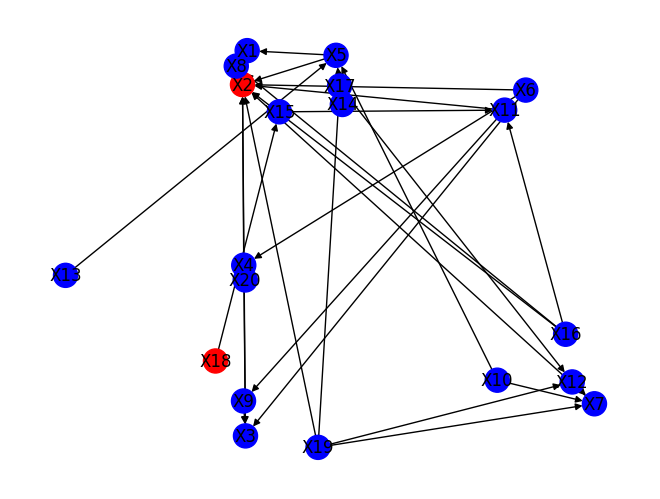

In [2]:
import networkx as nx
import numpy as np

# constructure networkx graph from adjacent matrix
G = nx.DiGraph(data['meta']['parent_weights'])

# transform node names from 0 to N-1 to X1 to XN
no_of_var = data['meta']['parent_weights'].shape[0]
original_names = [i for i in range(no_of_var)]
node_names = [("X%d" % (i + 1)) for i in range(no_of_var)]
mapping = dict(zip(original_names, node_names))
G = nx.relabel_nodes(G, mapping)

# label the root cause nodes 
color_list = np.array(['blue','red'])
node_color_idx = list((data['meta']['root_causes'] != 0).astype(int))
node_color = color_list[node_color_idx]
print(f"The generated graph: {nx.is_directed_acyclic_graph(G)} is directed and acyclic.")
nx.draw(G, with_labels = True, node_color=node_color)

In the graph, we can find X18 and X2 are two root causes.

In [18]:
import pandas as pd
true_matrix = pd.DataFrame((data['meta']['parent_weights']!=0).astype(int), columns=node_names, index=node_names)
true_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
X1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X6,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X10,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


We can infer this causal graph from the normal data.

In [10]:
from pyrca.graphs.causal.pc import PC
import pandas as pd

# load data
training_samples = data['data']['num_samples']
tot_data = data['data']['data']
normal_data = tot_data[:training_samples]
normal_data_df = pd.DataFrame(normal_data, columns=node_names)
abnormal_data = tot_data[training_samples:]
abnormal_data_df = pd.DataFrame(abnormal_data, columns=node_names)

# train causal graph construction model
model = PC(PC.config_class())
estimated_matrix = model.train(normal_data_df)

Depth=4, working on node 19: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 751.23it/s]


In [11]:
estimated_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
X1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can also evaluat the peformane of estimated graph using preceision, recall, f1 and shd

In [24]:
from pyrca.utils.evaluation import precision, recall, f1, shd

adjPrec = precision(true_matrix, estimated_matrix)
print(f"Precision: {adjPrec:.3f}")
adjRec = recall(true_matrix, estimated_matrix)
print(f"Recall: {adjRec:.3f}")
f1 = f1(true_matrix, estimated_matrix)
print(f"F1: {f1 :.3f}")
shd = shd(true_matrix, estimated_matrix)
print(f"SHD: {shd :.3f}")

Precision: 0.960
Recall: 0.800
F1: 0.873
SHD: 7


If you are not satisfied with the performance of estimated graph, you can add more domain knowledge, like required link, forbidden link, root nodes to improve the performance.

Given the estimated graph, we build a root cause localization model by using hypothesis testing algorithm. In the defult setting, the model would output the top-3 root cause nodes.

In [26]:
from pyrca.analyzers.ht import HT, HTConfig

model = HT(config=HTConfig(graph=estimated_matrix))
model.train(normal_data_df)

results = model.find_root_causes(abnormal_data_df, "X1", True).to_list()
print(results)

[{'root_cause': 'X18', 'score': 46.84041728803036, 'paths': ['X18', 'X15', 'X11', 'X2', 'X1']}, {'root_cause': 'X2', 'score': 8.471318414296478, 'paths': ['X2', 'X1']}, {'root_cause': 'X7', 'score': 2.3871968209950434, 'paths': ['X7', 'X2', 'X1']}]


We are able to identify the root causes X18 and X2 using a hypothesis testing algorithm, despite the estimated graph not being entirely accurate.